###Introduction

#### Credit card applications
Credit Card department in a bank is a leading data science adopter. Acquiring new credit card users is always a key priority for the bank. Giving credit cards without due diligence or assessment for creditworthiness is a huge risk.Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). 

Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays.
From the last many decades, the credit card department is using a data-driven credit assessment methodology called Credit Scoring, and the model is called application scorecard. The application scorecard helps in the calculating level of risk associated with an applicant and based on strategic priority at a time, they decide the cut off value of the score for approving or rejecting a credit card application.  

In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.



### Datasets Description:
There are 2 datasets present in this notebook:
Application record (contains general information about applicant, such as applicant gender, DOB, education type, assets that applicant had, etc.)
Credit record (contains applicant's loan payment records)

👉 There are 18 variables in Credit_card data set:

*   12 categorical variables,
*   5 continuous variables, and
*   1 variable to accommodate the applicant ID.

👉 There are 2 variables in Credit_card_label data set:

*   1 categorical variable for labels - 0 is application approved and 1 is    application rejected. 
*   1 variable to accommodate the applicant ID.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
users=pd.read_csv('/content/Credit_card.csv')
labels=pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
df=pd.merge(users,labels,how='inner',on='Ind_ID') #joining the 2 datasets

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

###Initial Analysis

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
# Checking for duplicate data
len(df['Ind_ID']) - len(df['Ind_ID'].unique())

0

In [ ]:
df['label'].value_counts() 

0    1373
1     175
Name: label, dtype: int64

We can see the data is highly imbalanced. We have 1373 records (0) for Approved and only 175 (1) for Rejected.

In [ ]:
df.isnull().sum() #counting the total null values in each column

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Null values will cause errors in our model. We need to handle them seperately before applying them in model.

In [ ]:
# Checking Min , Max values from 'Birthday_count' column
print('Min Birthday_count :', df['Birthday_count'].min(),'\nMax Birthday_count :',df['Birthday_count'].max())

Min Birthday_count : -24946.0 
Max Birthday_count : -7705.0


In [ ]:
# Converting 'Birthday_count' values from Day to Years
df['Birthday_count'] = round(df['Birthday_count']/-365,0)
df.rename(columns={'Birthday_count':'AGE_YEARS'}, inplace=True)

In [ ]:
# As mentioned in document, if 'Employed_days' is positive no, it means person currently unemployed, hence replacing it with 0
df['Employed_days'] = df['Employed_days'].apply(lambda x: 0 if x>0 else x)


In [ ]:
# Converting 'Employed_days' values from Day to Years
df['Employed_days'] = abs(round(df['Employed_days']/-365,0))
df.rename(columns={'Employed_days':'YEARS_EMPLOYED'}, inplace=True)  

###Dropping features that are not useful

In [ ]:
df['Mobile_phone'].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

In [ ]:
# As all the values in column are 1, hence dropping column
df.drop('Mobile_phone', axis=1, inplace=True)

In [ ]:
df['Phone'].value_counts()

0    1069
1     479
Name: Phone, dtype: int64

In [ ]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
df.drop('Phone', axis=1, inplace=True)

In [ ]:
df['EMAIL_ID'].value_counts()

0    1405
1     143
Name: EMAIL_ID, dtype: int64

In [ ]:
# This column only contains 0 & 1 values for Email ID submitted, hence dropping column
df.drop('EMAIL_ID', axis=1, inplace=True)

In [ ]:
df['Work_Phone'].value_counts()

0    1226
1     322
Name: Work_Phone, dtype: int64

In [ ]:
# This column only contains 0 & 1 values for  Work Phone no submitted, hence dropping column
df.drop('Work_Phone', axis=1, inplace=True)

### Handling features containing NULL values

In [ ]:
#checking for null values in each column
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
AGE_YEARS           22
YEARS_EMPLOYED       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# dropping occupation type which has many null values
df.drop('Type_Occupation', axis=1, inplace=True)

In [ ]:
#Relacing missing values in GENDER column with mode
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0]) 

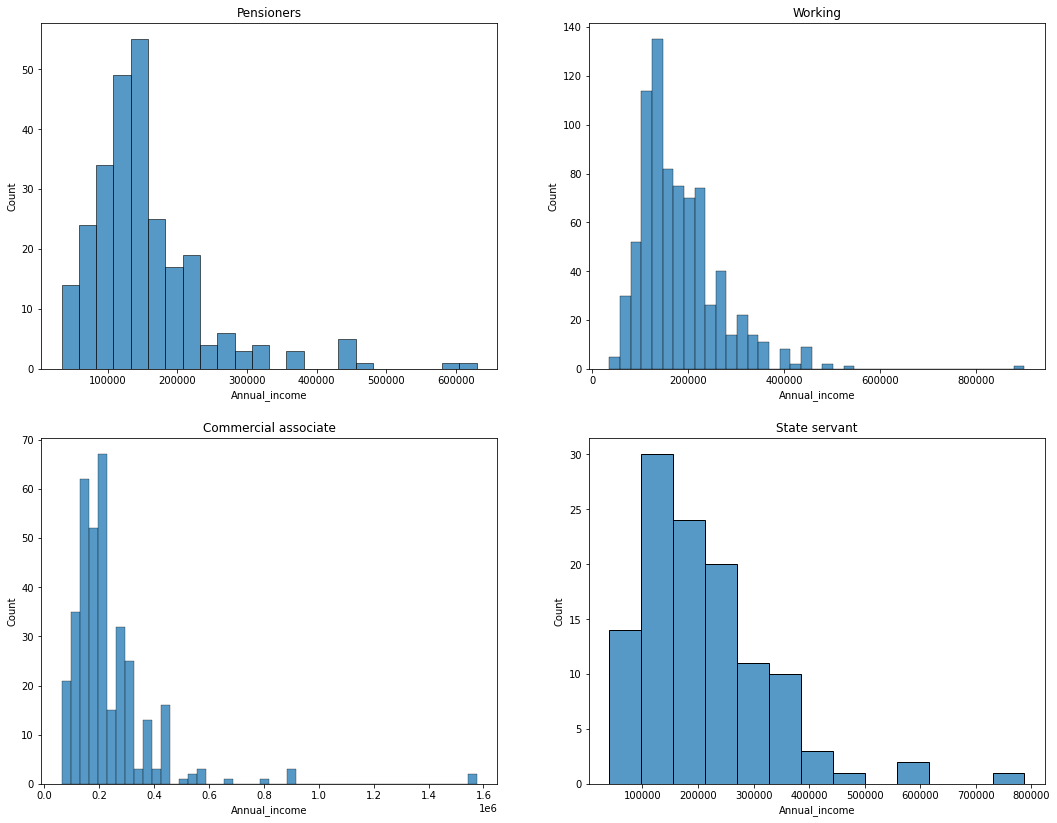

In [ ]:
#distribution of Annual_income for each income type

figure,axis=plt.subplots(2,2)
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='Pensioner'],ax=axis[0,0]).set(title='Pensioners')
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='Working'],ax=axis[0,1]).set(title='Working')
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='Commercial associate'],ax=axis[1,0]).set(title='Commercial associate')
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='State servant'],ax=axis[1,1]).set(title='State servant')
figure.set_size_inches(18,14)


In [ ]:
#checking null annual income records for each income type

df[df['Annual_income'].isnull()]['Type_Income'].value_counts()

Working                 11
Commercial associate     8
Pensioner                4
Name: Type_Income, dtype: int64

Calculating mean annual income for each income type

In [ ]:
# Calculating mean annual income for seperate income type
mean_pension=round(df[df['Type_Income']=='Pensioner']['Annual_income'].mean())
mean_working=round(df[df['Type_Income']=='Working']['Annual_income'].mean())
mean_commercial=round(df[df['Type_Income']=='Commercial associate']['Annual_income'].mean())

In [ ]:
def impute_income(cols):
    income = cols[0]
    iclass = cols[1]
    
    if pd.isnull(income):

        if  iclass== 'Pensioner':
            return mean_pension

        elif iclass == 'Working':
            return mean_working

        else:
            return mean_commercial

    else:
        return income

In [ ]:
#replacing null values of Annual_income with mean for each income type
df['Annual_income'] = df[['Annual_income','Type_Income']].apply(impute_income,axis=1)

In [ ]:
# Null values from annual income has been handled
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
AGE_YEARS         22
YEARS_EMPLOYED     0
Family_Members     0
label              0
dtype: int64

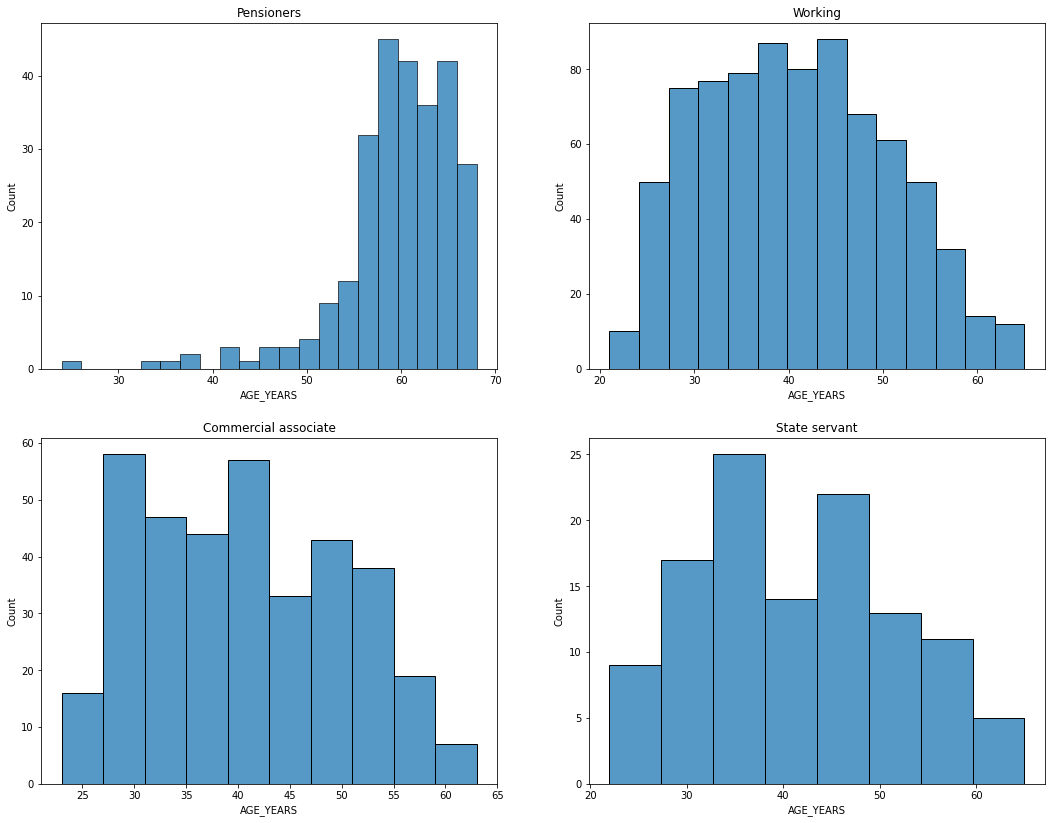

In [ ]:
#distribution of Age for different income types 

figure,axis=plt.subplots(2,2)
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='Pensioner'],ax=axis[0,0]).set(title='Pensioners')
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='Working'],ax=axis[0,1]).set(title='Working')
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='Commercial associate'],ax=axis[1,0]).set(title='Commercial associate')
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='State servant'],ax=axis[1,1]).set(title='State servant')
figure.set_size_inches(18,14)

In [ ]:
# Calculating mean age for seperate income type

birth_working=round(df[df['Type_Income']=='Working']['AGE_YEARS'].mean())

birth_pension=round(df[df['Type_Income']=='Pensioner']['AGE_YEARS'].mean())

birth_commercial=round(df[df['Type_Income']=='Commercial associate']['AGE_YEARS'].mean())

In [ ]:
def impute_birth(cols):
    birth = cols[0]
    iclass = cols[1]
    
    if pd.isnull(birth):

        if  iclass== 'Pensioner':
            return birth_pension

        elif iclass == 'Working':
            return birth_working

        else:
            return birth_commercial

    else:
        return birth

In [ ]:
df['AGE_YEARS'] = df[['AGE_YEARS','Type_Income']].apply(impute_birth,axis=1)

In [ ]:
# All null values have been handled
df.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
AGE_YEARS         0
YEARS_EMPLOYED    0
Family_Members    0
label             0
dtype: int64

In [ ]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,40.0,2.0,2,1
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


In [ ]:
df['CHILDREN'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

###Checking for Outliers

<AxesSubplot:xlabel='Annual_income'>

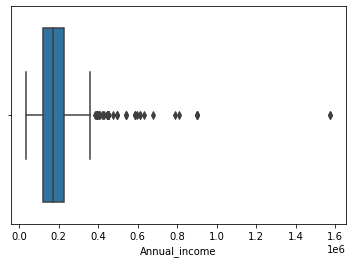

In [ ]:
sns.boxplot(x='Annual_income',data=df)

In [ ]:
# removing outliers from Annual_income
high_bound = df['Annual_income'].quantile(0.999)
print('high_bound :', high_bound)

high_bound : 1205775.0000001362


In [ ]:
df=df[df['Annual_income']<=high_bound]

<AxesSubplot:xlabel='CHILDREN', ylabel='count'>

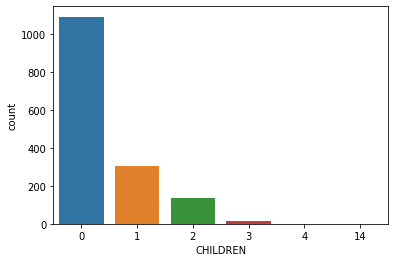

In [ ]:
# Most of the data lies between 0 to 3 children per application
sns.countplot(x='CHILDREN',data=users)

In [ ]:
#removing outliers from CHILDREN
high_bound = df['CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)

high_bound : 3.4550000000001546


In [ ]:
df = df[df['CHILDREN']<=high_bound]

In [ ]:
df.shape #shape of data after removing outliers

(1544, 14)

In [ ]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,40.0,2.0,2,1
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


In [ ]:
# using this cleaned data for answering SQL questions 
df.to_csv('Credit_clean.csv',header=True,index=False)

In [ ]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
df.drop('Ind_ID', axis=1, inplace=True)

<ipython-input-563-72d4cca4370e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Ind_ID', axis=1, inplace=True)


###Visualization

In [ ]:
df.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,40.0,2.0,2,1
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


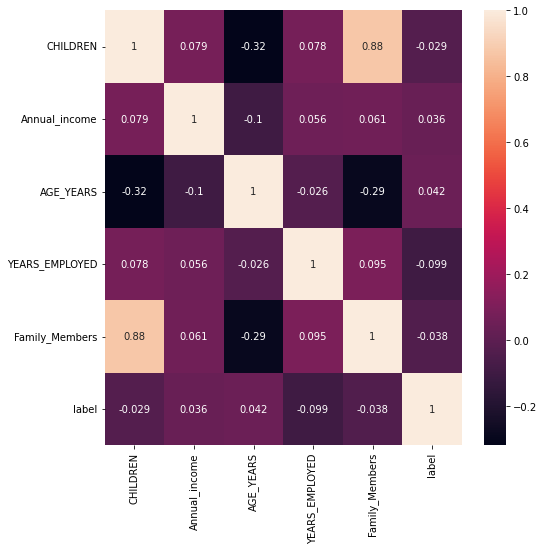

In [ ]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

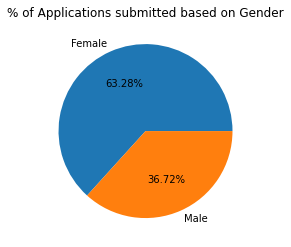

In [ ]:
# This graph shows that, majority of application are submitted by Female
plt.pie(df['GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

[Text(0.5, 1.0, 'Applications owning a car')]

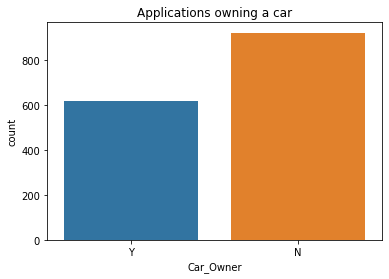

In [ ]:
# This graph shows majority of applications dont own a car
sns.countplot(x='Car_Owner',data=df).set(title='Applications owning a car')

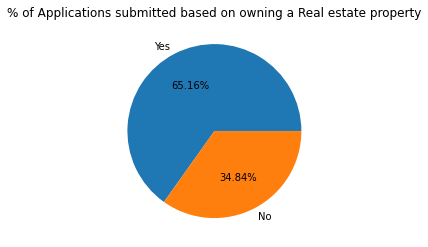

In [ ]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(df['Propert_Owner'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

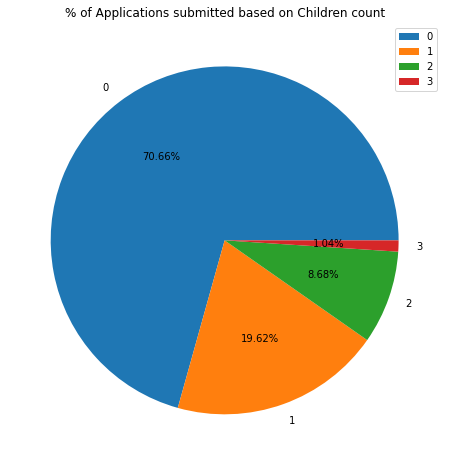

In [ ]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(df['CHILDREN'].value_counts(), labels=df['CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Income vs Family members')

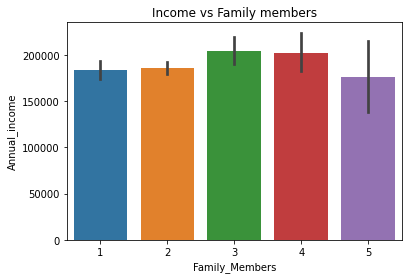

In [ ]:
# this distribution shows that most families have 2 members
sns.barplot(x='Family_Members',y='Annual_income',data=df)
plt.title('Income vs Family members')


[Text(0.5, 1.0, 'Annual Income vs Age')]

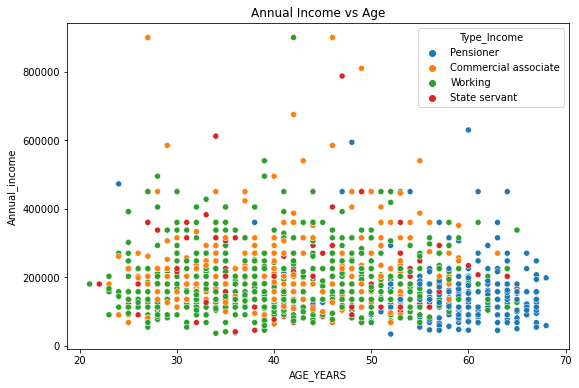

In [ ]:
# The plot shows that Pensioners tend to have higher age and Working class is distributed all over data. 
# Commercial associates tend to have higher income 
plt.figure(figsize=(9,6))
sns.scatterplot(x='AGE_YEARS',y='Annual_income',data=df,hue='Type_Income').set(title='Annual Income vs Age')

###Preprocessing

In [ ]:
#finding the non numeric columns
cat_columns = df.columns[(df.dtypes =='object').values].tolist()
cat_columns

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type']

In [ ]:
#Converting all non numeric columns to Numerical so that our ML model can understand
from sklearn.preprocessing import LabelEncoder

for i in cat_columns:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])

In [ ]:
df.head(25)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,2,1
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1
2,0,1,0,0,315000.0,0,1,1,1,40.0,2.0,2,1
3,0,1,0,0,234600.0,0,1,1,1,37.0,2.0,2,1
4,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1
5,0,1,0,0,315000.0,1,1,1,1,37.0,2.0,2,1
6,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1
7,0,0,0,0,180000.0,1,4,1,1,61.0,0.0,2,1
8,1,1,1,1,450000.0,0,4,1,1,50.0,2.0,3,1
9,1,1,1,1,450000.0,1,4,1,1,50.0,2.0,3,1


In [ ]:
X = df.drop(['label'], axis=1)
Y = df['label']

In [ ]:
# splitting our data for training and testing our model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,stratify=Y,
                                                    random_state = 10)

Our dataset contain features that are varying in degrees of magnitude, range and units. So we are scaling the data for making data points generalized so that the distance between them will be lower.

In [ ]:
# scaling all features using MinMaxScaler. This will scale all values in the range 0 to 1.

from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [ ]:
# training data after scaling
x_train.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members
0,0.0,1.0,1.0,0.000000,0.090909,1.000000,0.25,0.25,0.2,0.148936,0.024390,0.25
1,1.0,0.0,1.0,0.000000,0.220779,0.000000,1.00,0.25,0.2,0.234043,0.243902,0.25
2,0.0,0.0,1.0,0.000000,0.142857,0.333333,0.75,0.25,0.2,0.914894,0.000000,0.25
3,1.0,1.0,1.0,0.000000,0.116883,1.000000,1.00,0.25,0.2,0.170213,0.024390,0.25
4,1.0,0.0,1.0,0.333333,0.106494,1.000000,1.00,0.00,0.2,0.276596,0.000000,0.50


In [ ]:
# testing data after scaling
x_test.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members
0,0.0,0.0,1.0,0.000000,0.246753,0.000000,1.00,0.25,0.2,0.276596,0.195122,0.25
1,1.0,1.0,1.0,0.666667,0.480519,0.000000,0.25,0.25,0.2,0.595745,0.292683,0.75
2,0.0,0.0,1.0,0.000000,0.012468,0.333333,1.00,0.25,0.2,0.893617,0.000000,0.25
3,1.0,0.0,1.0,0.666667,0.376623,0.666667,0.25,0.25,0.2,0.489362,0.365854,0.75
4,0.0,0.0,1.0,0.666667,0.090909,1.000000,1.00,0.25,1.0,0.404255,0.024390,0.75


### Balancing Dataset

In [ ]:
y_train.value_counts()

0    958
1    122
Name: label, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

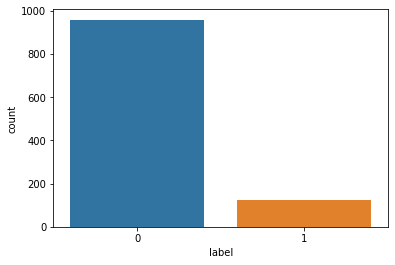

In [ ]:
sns.countplot(y_train)

As we can see that most of the records are for application approved. This is not good for ML model as it will be biased to one label

In [ ]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test, y_test)

In [ ]:
# label count after using SMOTE 
y_train_oversam.value_counts()

0    958
1    958
Name: label, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

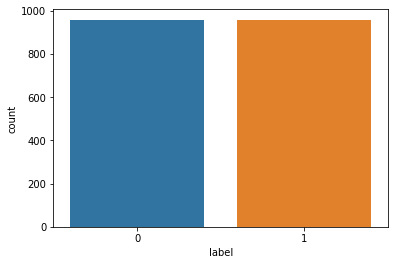

In [ ]:
sns.countplot(y_train_oversam)

Now we have equal records for both labels. We can now use this to our model

### Machine Learning models

In [ ]:
#creating lists for storing the accuracy scores of each model and the model name
acc_score=[]
models=[]

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)
prediction=log_model.predict(x_test_oversam)
print("Accuracy score using Logistic Regression =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))
      

Accuracy score using Logistic Regression = 0.5728155339805825

Classification report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       412
           1       0.58      0.50      0.54       412

    accuracy                           0.57       824
   macro avg       0.57      0.57      0.57       824
weighted avg       0.57      0.57      0.57       824



In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)
prediction=decision_model.predict(x_test_oversam)
print("Accuracy score using DecisionTreeClassifier =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using DecisionTreeClassifier = 0.7645631067961165

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       412
           1       0.83      0.66      0.74       412

    accuracy                           0.76       824
   macro avg       0.78      0.76      0.76       824
weighted avg       0.78      0.76      0.76       824



In [ ]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)
prediction = svc_model.predict(x_test_oversam)

print("Accuracy score using SVC =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using SVC = 0.6796116504854369

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       412
           1       0.67      0.71      0.69       412

    accuracy                           0.68       824
   macro avg       0.68      0.68      0.68       824
weighted avg       0.68      0.68      0.68       824



In [ ]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)
prediction = XGB_model.predict(x_test_oversam)

print("Accuracy score using XGBoost =",accuracy_score(prediction,y_test_oversam))

      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using XGBoost = 0.8725728155339806

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       412
           1       0.94      0.79      0.86       412

    accuracy                           0.87       824
   macro avg       0.88      0.87      0.87       824
weighted avg       0.88      0.87      0.87       824



Text(0, 0.5, 'Accuracy_score')

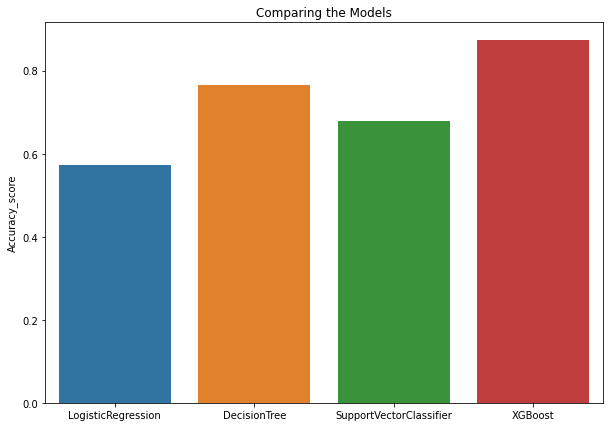

In [ ]:
plt.figure(figsize=(10,7))
models=['LogisticRegression','DecisionTree','SupportVectorClassifier','XGBoost']
sns.barplot(x=models,y=acc_score).set(title='Comparing the Models')
plt.ylabel('Accuracy_score')

###Conclusion


As we can see that XGBoost model is performing the best with highest accuracy score. Hence we will use XGBoost Model for predicion.

Why Xgbooost is performing the best?

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost and gradient boosting machines are both ensemble tree methods that apply the principle of boosting weak learners using the gradient descent architecture. It goes through a cycle: first, it tests the existing models on a validation set; then, it adds a model to make the predictions better, each time putting more weight on instances with wrong predictions thus learning from past mistakes. This cycle repeats till an optimal ensemble method is reached (or till the max number of iterations is reached).